# Aruodas real estate postings data analysis

## Introduction

This analysis explores the offerings provided by the Aruodas.lt platform. The aim, was to perform an exploratory data analysis, compare privately and company owned postings, and finally train a model that would be able to determine a price of a real estate, given a set of descriptive features.

Posing's in the city of Vilnius were scraped on April the 18th. 
All available information on a given posting was collected.

For data scraping, Python's Selenium library was used. The code will not be included in this notebook.

In [4]:
# importing the necessary libraries for exploratory data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# sample of the raw scraped data:
pd.read_csv('scraped_data_private.csv').head(5)

,Unnamed: 0,title,price,area,room_n,floor_n,floor_total,year,building_type,heating_type,equip_state,nearest_kindergarten,nearest_school,nearest_shop,nearest_station,crime_last_month,owner_type
0,0,"Vilnius, Pilaitė, Elbingo g., 5 kambarių butas",196 000 €,116 m²,5,1,1,2019,Mūrinis,Geoterminis,"Įrengtas NAUDINGA: Idėjos, kaip įsirengti inte...",NaN,NaN,NaN,NaN,NaN,private
1,1,"Vilnius, Karoliniškės, Sausio 13-osios g., 2 k...",99 999 €,"51,47 m²",2,2,7,2015,Mūrinis,Centrinis kolektorinis,"Įrengtas NAUDINGA: Idėjos, kaip įsirengti inte...",~ 420 m,~ 160 m,~ 100 m,~ 270 m,9.0,private
2,2,"Vilnius, Senamiestis, Jogailos g., 1 kambario ...",160 000 €,36 m²,1,4,6,1914,Mūrinis,Centrinis,"Įrengtas NAUDINGA: Idėjos, kaip įsirengti inte...",~ 210 m,~ 570 m,~ 50 m,~ 70 m,22.0,private
3,3,"Vilnius, Bajorai, Fizikų g., 2 kambarių butas",115 500 €,"48,29 m²",2,4,5,2019,Mūrinis,Centrinis kolektorinis,"Įrengtas NAUDINGA: Idėjos, kaip įsirengti inte...",~ 850 m,"~ 1,1 km",~ 100 m,~ 170 m,2.0,private
4,4,"Vilnius, Naujoji Vilnia, Pramonės g., 1 kambar...",14 999 €,"28,54 m²",1,2,4,1990,Mūrinis,Elektra,"Dalinė apdaila NAUDINGA: Idėjos, kaip įsirengt...",~ 540 m,~ 610 m,~ 780 m,~ 300 m,3.0,private


In [16]:
# the data was initially cleaned. The resulting dataframe looked like this:
cleaned = pd.read_csv('df_preprcessed.csv')
cleaned.head(5)

,Unnamed: 0,title,price,area,room_n,floor_n,floor_total,year,building_type,heating_type,equip_state,nearest_kindergarten,nearest_school,nearest_shop,nearest_station,crime_last_month,owner_type,district,street
0,0,"Vilnius, Pilaitė, Bitėnų g., 3 kambarių butas",91 000,57.94,3,4,5,2021,Mūrinis,centrinis kolektorinis,Dalinė apdaila,580,210,480,180.0,1.0,company,Pilaitė,Bitėnų g.
1,1,"Vilnius, Pilaitė, Bitėnų g., 3 kambarių butas",90 000,59.88,3,1,5,2021,Mūrinis,centrinis kolektorinis,Dalinė apdaila,590,150,450,130.0,1.0,company,Pilaitė,Bitėnų g.
2,2,"Vilnius, Pilaitė, Bitėnų g., 3 kambarių butas",75 000,52.44,3,2,5,2021,Mūrinis,centrinis kolektorinis,Dalinė apdaila,580,210,480,180.0,1.0,company,Pilaitė,Bitėnų g.
3,3,"Vilnius, Bajorai, Bajorų kel., 4 kambarių butas",108 800,69.51,4,2,6,2021,Mūrinis,centrinis kolektorinis,Dalinė apdaila,"1,4k","1,7k",530,30.0,2.0,company,Bajorai,Bajorų kel.
4,4,"Vilnius, Pilaitė, Bitėnų g., 3 kambarių butas",100 000,65.10,3,2,5,2021,Mūrinis,centrinis kolektorinis,Dalinė apdaila,520,140,420,70.0,2.0,company,Pilaitė,Bitėnų g.


In [17]:
# In total, 2795 postings were scraped.
(cleaned.shape)

(2795, 19)

In [18]:
#Data collected from Aruodas overview:
cleaned.head()

,Unnamed: 0,title,price,area,room_n,floor_n,floor_total,year,building_type,heating_type,equip_state,nearest_kindergarten,nearest_school,nearest_shop,nearest_station,crime_last_month,owner_type,district,street
0,0,"Vilnius, Pilaitė, Bitėnų g., 3 kambarių butas",91 000,57.94,3,4,5,2021,Mūrinis,centrinis kolektorinis,Dalinė apdaila,580,210,480,180.0,1.0,company,Pilaitė,Bitėnų g.
1,1,"Vilnius, Pilaitė, Bitėnų g., 3 kambarių butas",90 000,59.88,3,1,5,2021,Mūrinis,centrinis kolektorinis,Dalinė apdaila,590,150,450,130.0,1.0,company,Pilaitė,Bitėnų g.
2,2,"Vilnius, Pilaitė, Bitėnų g., 3 kambarių butas",75 000,52.44,3,2,5,2021,Mūrinis,centrinis kolektorinis,Dalinė apdaila,580,210,480,180.0,1.0,company,Pilaitė,Bitėnų g.
3,3,"Vilnius, Bajorai, Bajorų kel., 4 kambarių butas",108 800,69.51,4,2,6,2021,Mūrinis,centrinis kolektorinis,Dalinė apdaila,"1,4k","1,7k",530,30.0,2.0,company,Bajorai,Bajorų kel.
4,4,"Vilnius, Pilaitė, Bitėnų g., 3 kambarių butas",100 000,65.10,3,2,5,2021,Mūrinis,centrinis kolektorinis,Dalinė apdaila,520,140,420,70.0,2.0,company,Pilaitė,Bitėnų g.


#### data description

- title: Title of the real estate ad.
- price: The price of the real estate
- area: Area in meters squared (m2)
- room_n: Number of rooms
- floor_n: Floor number, in which the real estate located.
- floor_total: Total number of floors, that the building has.
- year: The year, in which it was built.
- building_type: Type of building, in Lithuanian (Mūrinis, Blokinis, Monolitinis, Medinis, Rąstinis, Karkasinis, Kita)
- heating_type: Type of heating installed, in Lithuanian (elektra, centrinis kolektorinis, centrinis, dujinis, kietu kuru, aeroterminis, geoterminis)
- equip_state: The state of the building, equipped, in Lithuanian (Įrengtas, Dalinė apdaila, Neįrengtas, Nebaigtas statyti)
- nearest_kindergarden: Distance to the nearest kindergarden.
- nearest_school: Distance to the nearest school.
- nearest_shop: Distance to the nearest shop.
- nearest_station: Distance to the nearest station.
- crime_last_month: Number of crimes in the last month, as provided by Aruodas.lt.
- owner_type: Type of ownership (Private, Company)
- district: The name of the district where the real estate is located.
- street: The name of the street where the real estate is located.

### Exploratory data analysis

In [19]:
# Building type and heating type columns were encoded with OneHotEncoder, the original columns have been removed.
df = pd.read_csv('data_preprocessed.csv')

In [20]:
df.columns

Index(['Unnamed: 0', 'title', 'owner_type', 'district', 'street', 'price',
       'area', 'price_per_sqm', 'room_n', 'floor_ratio', 'floor_n',
       'floor_total', 'year', 'nearest_kindergarten', 'nearest_school',
       'nearest_shop', 'nearest_station', 'crime_last_month', 'h_aeroterminis',
       'h_centrinis', 'h_centrinis kolektorinis', 'h_dujinis', 'h_elektra',
       'h_geoterminis', 'h_kietu kuru', 'h_kita', 'b_Blokinis', 'b_Karkasinis',
       'b_Kita', 'b_Medinis', 'b_Monolitinis', 'b_Mūrinis', 'b_Rąstinis'],
      dtype='object')

In [27]:
#AVG district prices by ownership type
c_df = df[df['owner_type'] == 'company']
p_df = df[df['owner_type'] == 'private']

c_mean_prices_per_district = c_df.groupby('district')['price_per_sqm'].mean().to_frame()
p_mean_prices_per_district = p_df.groupby('district')['price_per_sqm'].mean().to_frame()

most_expensive = df.groupby('district')['price_per_sqm'].mean().sort_values(ascending=True)[-10:]
most_expensive_p_prices = p_df[p_df['district'].isin(most_expensive.index)].groupby('district')['price_per_sqm'].mean().sort_values(ascending=True)
most_expensive_c_prices = c_df[c_df['district'].isin(most_expensive_p_prices.index)].groupby('district')['price_per_sqm'].mean().sort_values(ascending=True)

c_most_exp_df = pd.DataFrame(most_expensive_c_prices, columns = ['price_per_sqm'])
p_most_exp_df = pd.DataFrame(most_expensive_p_prices, columns = ['price_per_sqm'])
most_exp_df = pd.concat([c_most_exp_df, p_most_exp_df], axis=1, ignore_index=False)

c_df_n_postings = c_df.groupby('district').count()['title'].sort_values(ascending=True)[-10:].to_frame()
p_df_n_postings = p_df.groupby('district').count()['title'].to_frame()
p_df_n_postings_by_c = p_df_n_postings[p_df_n_postings.index.isin(c_df_n_postings.index)]

In [28]:
print('Average price per square meter for company owners is {0} EUR'.format(round(c_df['price_per_sqm'].mean())))

print('Average price per square meter for private owners is {0} EUR'.format(round(p_df['price_per_sqm'].mean())))
print()
print('Average building age for companies is {0} years'.format(2021 - round(c_df['year'].mean())))

print('Average building age for private owners is {0} years'.format(2021 - round(p_df['year'].mean())))

Average price per square meter for company owners is 2042 EUR
Average price per square meter for private owners is 1944 EUR

Average building age for companies is 22 years
Average building age for private owners is 28 years


Text(0.5, 0.98, 'Price comparison for most expensive districts')

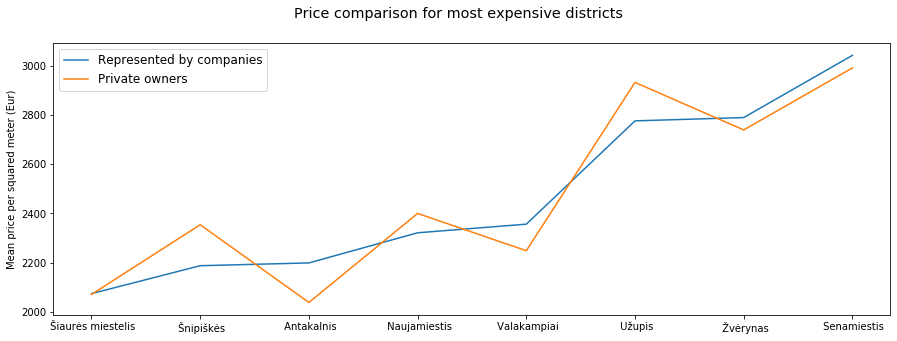

In [29]:
fig, axs = plt.subplots(figsize=(15, 5), sharey=True)

axs.plot(most_exp_df.iloc[:, 0], label='Represented by companies')
axs.plot(most_exp_df.iloc[:, 1], label='Private owners')
plt.ylabel('Mean price per squared meter (Eur)')
fontsize = 'large'
plt.legend(fontsize = 'large')
fig.suptitle('Price comparison for most expensive districts', fontsize = 'x-large')

In [166]:
print('The price per square meter of postings represented by companies is on average {0} percent higher.'.format(round(((2042-1944)/2042)*100, 2)))

The price per square meter of postings represented by companies is on average 4.8 percent higher.


Text(0.5, 0.98, 'Top 10 districts by number of postings')

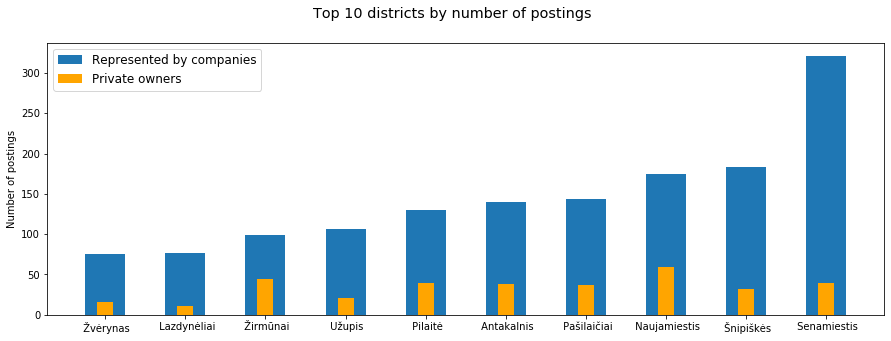

In [30]:
c_names = c_df_n_postings.index
c_values = c_df_n_postings['title']

p_names = p_df_n_postings_by_c.index
p_values = p_df_n_postings_by_c['title']

fig, axs = plt.subplots(figsize=(15, 5), sharey=True)

axs.bar(c_names, c_values, width=0.5, label='Represented by companies')
axs.bar(p_names, p_values, color='orange', width=0.2, label='Private owners')
axs.legend(fontsize = 'large')
axs.set_ylabel('Number of postings')
fig.suptitle('Top 10 districts by number of postings', fontsize = 'x-large')

## Statistical analysis. 
The aim is to develop a model, that could accurately predict a price of a real estate based on its features.

In [5]:
# importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import ensemble

### Feature encoding

- Categorical features 'building_type' and 'heating_type' have been encoded with OneHotEncoder,
- Feature 'year' was changed to 'age' 
- Feature 'equip_state' was encoded with LabelEncoder, and given values ranging for 0 to 3, each representing the level of equipment of the real estate posting


### Model training

In [32]:
df1 = pd.read_csv('intermediate_save.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df1['age'] = 2021 - df1['year']

In [33]:
df1.columns

Index(['title', 'owner_type', 'district', 'street', 'price', 'area',
       'price_per_sqm', 'room_n', 'floor_ratio', 'floor_n', 'floor_total',
       'year', 'nearest_kindergarten', 'nearest_school', 'nearest_shop',
       'nearest_station', 'crime_last_month', 'h_aeroterminis', 'h_centrinis',
       'h_centrinis kolektorinis', 'h_dujinis', 'h_elektra', 'h_geoterminis',
       'h_kietu kuru', 'h_kita', 'b_Blokinis', 'b_Karkasinis', 'b_Kita',
       'b_Medinis', 'b_Monolitinis', 'b_Mūrinis', 'b_Rąstinis', 'age'],
      dtype='object')

In [34]:
y = df1['price']
X = df1[['area','room_n', 'floor_n', 'floor_total', 'age', 'crime_last_month','nearest_kindergarten', 'nearest_school',
       'nearest_shop', 'nearest_station', 'h_aeroterminis',
       'h_centrinis', 'h_centrinis kolektorinis', 'h_dujinis', 'h_elektra',
       'h_geoterminis', 'h_kietu kuru', 'h_kita','b_Blokinis', 'b_Karkasinis',
       'b_Kita', 'b_Medinis', 'b_Monolitinis', 'b_Mūrinis', 'b_Rąstinis']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

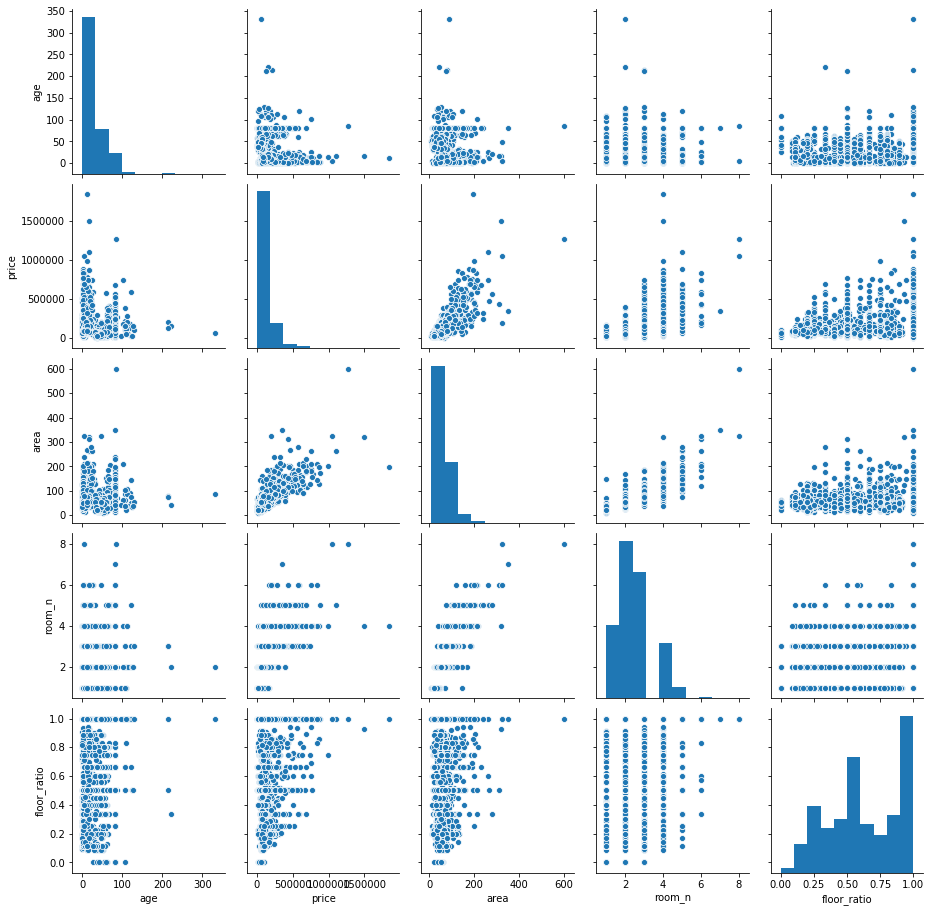

In [35]:
sns.pairplot(df1[['age', 'price', 'area', 'room_n', 'floor_ratio']])

#### Correlation heatmap 

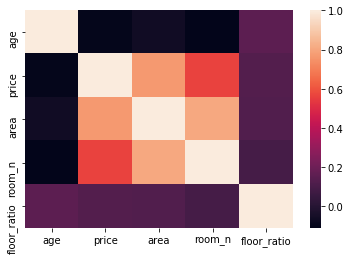

In [12]:
sns.heatmap(df1[['age', 'price', 'area', 'room_n', 'floor_ratio']].corr())

Area seems to have the largest correlation value with the price. Linear Regression model was tested:

#### Linear Regression
As anticipated, the R2 score was not very high for the predicted values. Many other factors are involved in the price of a real estate, not only area. Although the model was fitted with other variables as well, it failed to consistently predict accurately the price. The largest R2 score was around 0.7.

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train.astype(int))
predictions = lin_reg.predict(X_test)

In [39]:
r2_score(y_test, predictions)

0.7091296905672045

#### Support Vector Regression
The SVR was fitted, using linear kernel, however very similar results were obtained.

In [40]:
regressor = SVR(kernel = 'linear', degree = 1)
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))

0.6096689303627169


#### GradientBoostingRegressor
A more complex model was used, which does its predictions based on ensemble of decision trees. Straight away, it has acknowledged for different features, and it consistently predicted on a accuracy of around 0.75.

Using RandomizedGridSearch, optimal parameters have been estimated.

In [41]:
parameters = {"loss":["ls"],
            "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
            "max_depth": [1, 3, 5],
            "subsample": [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
            "n_estimators": [1000, 1500]}


gbr = ensemble.GradientBoostingRegressor()

clf = RandomizedSearchCV(gbr, parameters, n_iter=10)  
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                          

In [42]:
clf.best_params_

{'subsample': 0.9,
 'n_estimators': 1000,
 'max_depth': 5,
 'loss': 'ls',
 'learning_rate': 0.075}

In [43]:
gbr1 = ensemble.GradientBoostingRegressor(subsample = 0.5, n_estimators = 1000, max_depth = 3, loss='ls', learning_rate = 0.1)
gbr1.fit(X_train, y_train)
gbr1.score(X_test, y_test)

0.7985227850395884

In [44]:
scores = cross_val_score(gbr1, X, y, cv=5)
scores

array([0.81715482, 0.69294491, 0.81497356, 0.69736174, 0.74888618])

In [46]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.11)


#### Ploting the feature importance for the initial estimation
Besides area, which is the most important feature, 'crime_last_month' and 'nearest_school' seemed to be also helping the model to find the price for a given posting. This can be explained, based on the fact that these values are provided by Aruodas for a given district, therefore the model seemed to find patterns between the districts, and they somewhat estimate the location of the real estate.

Text(0.5, 0.98, 'Feature importances plot')

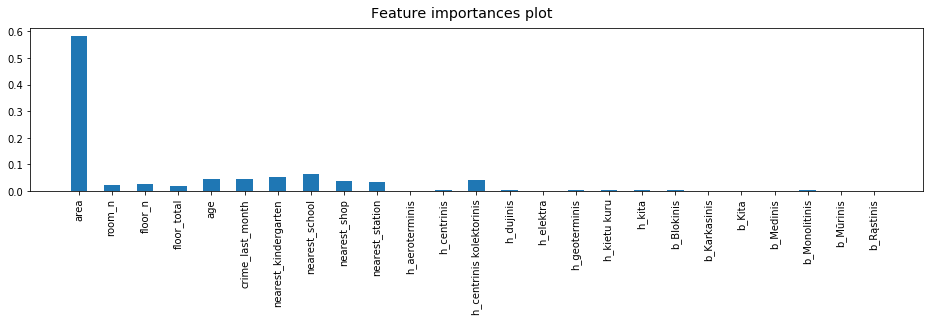

In [47]:
plt.figure(figsize=(16,3))
plt.xticks(rotation='vertical')
plt.bar(X.columns, gbr1.feature_importances_
, width=0.5)
plt.suptitle('Feature importances plot', fontsize = 'x-large')

### Additional feature engineering

#### Coordinates
Although the GradientBoostRegressor seemed to provide better results (with an accuracy around 0.75), there was still area for improvement. As was previously mentioned, location is an important indicator of the price price for a given real estate, however there is a lack of accurate data of that in the training set. Therefore, given the fact that the postings contain quite accurate location - the street, using GeoPy library, longitude and latitude values were generated and 'longitude' and 'latitude' features were created.

In [8]:
df3 = pd.read_csv('df3_latest.csv')

In [275]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="jkb.pyt@gmail.com")

def get_latitude(item):
    try:
        time.sleep(1)
        return geolocator.geocode(item).latitude
    except GeocoderTimedOut:
        return get_latitude(item)
    except AttributeError:
        return ''

def get_longitude(item):
    try:
        time.sleep(1)
        return geolocator.geocode(item).longitude
    except GeocoderTimedOut:
        return get_longitude(item)
    except AttributeError:
        return ''

In [278]:
df1['longitude'] = df1['location'].apply(get_longitude)
df1['latitude'] = df1['location'].apply(get_longitude)

The coordinates were scaled using StandardScaler, in order to yield better results:


In [ ]:
# Scaling the coordinates
ss = StandardScaler()
coordinates = df1[['longitude', 'latitude']]
scaled_coordinates = ss.fit_transform(coordinates)
scaled_coordinates = pd.DataFrame(scaled_coordinates)
scaled_coordinates[['lon_scaled', 'lat_scaled']] = scaled_coordinates[[0, 1]]

#### Plot of the postings, grouped by streets, on the map of Vilnius

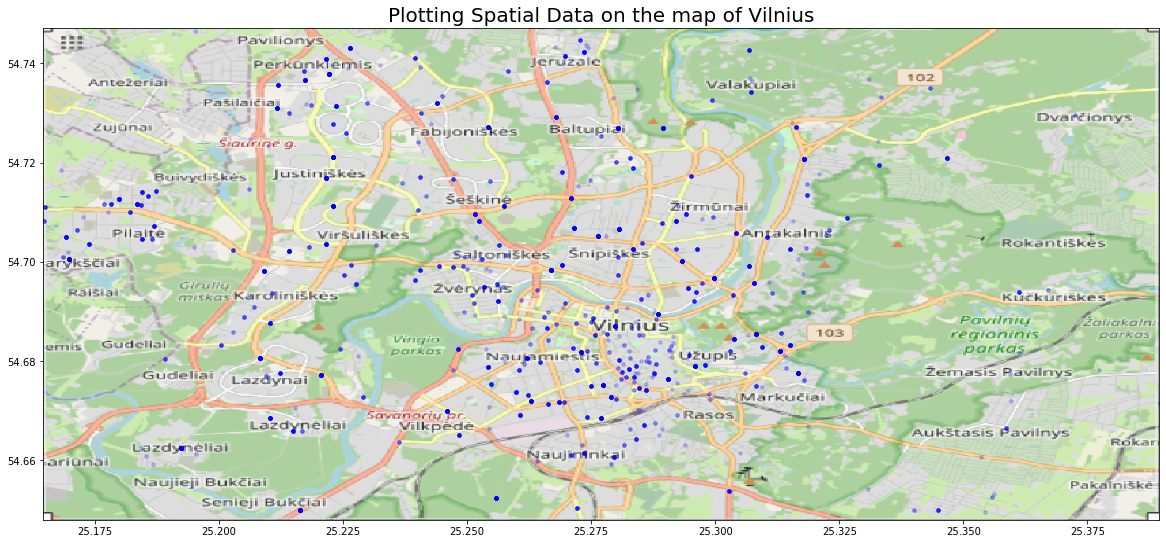

In [49]:
vln_map = plt.imread('vilnius_map.png')
BBox = (25.1645, 25.3894, 54.6480, 54.7472)

fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df3.longitude, df3.latitude, zorder=1, alpha= 0.2, c='b', s=12)
ax.set_title('Plotting Spatial Data on the map of Vilnius', {'fontsize': 20})
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(vln_map, zorder=0, extent = BBox, aspect= 'equal')

#### Binning the district
Moreover, apart from location, it is quite obvious that some locations are still perceived as better quality, and therefore their price per square meters value is higher. 
Another feature was created called 'tier', in which the districts were grouped into 5 tiers (ranging from tier1 to tier5), indicating to which group of districts they belong.
This feature was created by taking the mean price per squared meters for each district and grouping them on districts. 

Dividing districts into five categories, based on their price per squared meter value. This should reflect the location of the district and favourability by buyers.

- tier1 = >2500
- tier2 = 2000 - 2500
- tier3 = 1500 - 2000
- tier4 = 1000 - 1500
- tier5 = <1000

In [9]:
df3['tier'].value_counts()

tier3    937
tier2    839
tier1    585
tier4    404
tier5     18
Name: tier, dtype: int64

In [522]:
df3['tier'].value_counts().sort_values(ascending=False).index


Index(['tier3', 'tier2', 'tier1', 'tier4', 'tier5'], dtype='object')

Text(0.5, 0.98, 'Number of postings for each group')

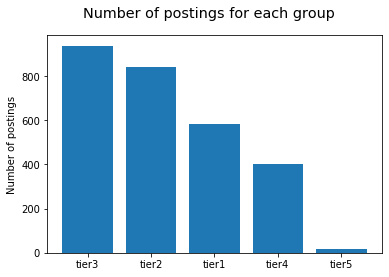

In [51]:
plt.ylabel('Number of postings')
plt.bar(df3['tier'].value_counts().index, df3['tier'].value_counts())
plt.suptitle('Number of postings for each group', fontsize = 'x-large')


In [ ]:

plt.figure(figsize=(16,3))
plt.xticks(rotation='vertical')
plt.bar(df3['tier'], df3['tier'].value_counts)
plt.suptitle('Feature importances plot', fontsize = 'x-large')

#### Re-fitting the GBR model again with new features

In [52]:
df3.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'owner_type', 'district', 'street',
       'price', 'area', 'price_per_sqm', 'room_n', 'floor_ratio', 'floor_n',
       'floor_total', 'year', 'nearest_kindergarten', 'nearest_school',
       'nearest_shop', 'nearest_station', 'crime_last_month', 'h_aeroterminis',
       'h_centrinis', 'h_centrinis kolektorinis', 'h_dujinis', 'h_elektra',
       'h_geoterminis', 'h_kietu kuru', 'h_kita', 'b_Blokinis', 'b_Karkasinis',
       'b_Kita', 'b_Medinis', 'b_Monolitinis', 'b_Mūrinis', 'b_Rąstinis',
       'age', 'location', 'latitude', 'tier', 'longitude', 't1', 't2', 't3',
       't4', 't5', 'lon_scaled', 'lat_scaled', 'equip_state',
       'equip_state_encoded'],
      dtype='object')

In [47]:
y = df3['price']
X = df3[['area', 'age', 'lon_scaled', 'nearest_kindergarten', 'nearest_school',
       'nearest_shop', 'nearest_station', 'lat_scaled', 'crime_last_month', 't1', 't2', 't3', 't4', 't5']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
gbr2 = ensemble.GradientBoostingRegressor(subsample = 0.5, n_estimators = 1500, max_depth = 5, loss='ls', learning_rate = 0.025)

gbr2.fit(X_train, y_train)

gbr2.score(X_test, y_test)

0.7900264578324985

In [49]:
# cross validation
scores = cross_val_score(gbr2, X, y, cv=5)
scores

array([0.81564214, 0.79259214, 0.83467626, 0.69132038, 0.6988351 ])

In [50]:
# Accuracy within 95 confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.12)


Text(0.5, 0.98, 'Feature importances plot')

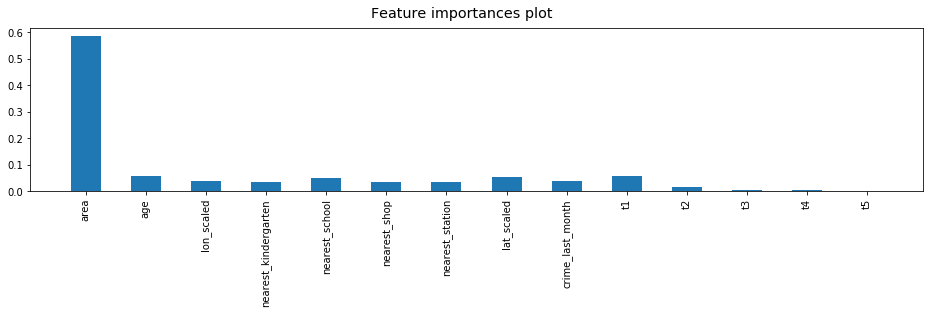

In [51]:
plt.figure(figsize=(16,3))
plt.xticks(rotation='vertical')
plt.bar(X.columns, gbr2.feature_importances_
, width=0.5)
plt.suptitle('Feature importances plot', fontsize = 'x-large')

Text(0.5, 0.98, 'Price distribution')

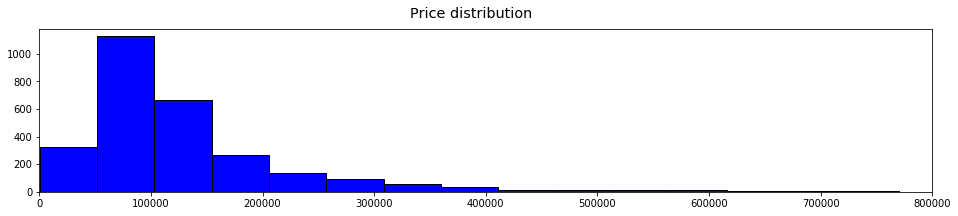

In [58]:
# As we can see the price is most distributed around 100 000.

plt.figure(figsize=(16,3))
plt.hist(df3['price'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlim(left=0, right=800000) 
plt.suptitle('Price distribution', fontsize = 'x-large')

### Conclusion
Although the new added features were rankes by the model as having higher relevance, The final GBR model seemed to predict with accuracy around 80%. Also, while performing CrossValidation, the scores on different tests varied by at least 10 percent. This might be because the training data in the model is quite inbalanced, as there are more postings that belong to a higher price category, that are centered around the center of the city, therefore having similar coordinates values. Therefore, when the model tries to predict prices of other districts with lower price categories, the price may have more variance, and therefore the accuracy of predicitons decreases. One possible solution, would be to scrape more postings that are from different areas than the central, to collect more data for the other districts.

And naturally, more data regarding the features of the real estate ad that actually have more impact on the price could be collected and added, and the model could improve its accuracy as well.

#### Test on an unseen posting from May 2nd:

In [45]:
X = np.array([35, 2,
        6, 6, 2, -0.022761, 0,
       0, 1, 0, 0,
       0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0.023363, 2, 0, 1, 0, 0, 0, 0])

In [46]:
print('Prediction: ' + str(gbr2.predict(X.reshape(1, -1))[0]))

ValueError: Number of features of the model must match the input. Model n_features is 17 and input n_features is 29 

The actual price of the real estate was 98 000. The model overestimated the price by 15 000. This could be quite an accurate prediction, as the model was trained well on postings with price around 100 000. If we would give it features from a more expensive posting, the price estimation would most likely be less accurate.